In [1]:
import pandas as pd
import statsmodels.api as sm


# Load the datasets
options = pd.read_csv('/Users/jorambakker/Downloads/Optionprices(1).csv')
sp500_df = pd.read_csv('/Users/jorambakker/Downloads/SP500.csv')

# Convert the 'date' columns to datetime if not already done
options['date'] = pd.to_datetime(options['date'])#, format = '%Y-%M-%d')
options['exdate'] = pd.to_datetime(options['exdate'])#, format = '%Y-%M-%d')
sp500_df['date'] = pd.to_datetime(sp500_df['date'])#,format = '%Y-%M-%d')


/var/folders/wn/lk75hc7s65b7ljzsdgw30f7c0000gn/T/ipykernel_18026/874774854.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  options = pd.read_csv('/Users/jorambakker/Downloads/Optionprices(1).csv')


In [2]:
options[0:54]

,secid,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,impl_volatility,optionid,am_settlement,expiry_indicator,index_flag,issuer,exercise_style,am_set_flag
0,108105,1996-01-04,1996-02-17,NaN,C,570000,48.2500,49.2500,NaN,10016457,1,NaN,1,CBOE S&P 500 INDEX,E,NaN
1,108105,1996-01-04,1996-01-20,1996-01-04,P,525000,0.0000,0.1250,0.328031,10177366,1,NaN,1,CBOE S&P 500 INDEX,E,NaN
2,108105,1996-01-04,1996-02-17,1996-01-04,P,625000,12.2500,13.0000,0.118755,10055271,1,NaN,1,CBOE S&P 500 INDEX,E,NaN
3,108105,1996-01-04,1996-01-20,NaN,C,550000,65.5000,66.5000,NaN,10138041,1,NaN,1,CBOE S&P 500 INDEX,E,NaN
4,108105,1996-01-04,1996-02-17,1996-01-04,C,615000,10.6250,11.3750,0.099821,10060564,1,NaN,1,CBOE S&P 500 INDEX,E,NaN
5,108105,1996-01-04,1996-01-20,NaN,C,525000,90.5000,91.5000,NaN,10206430,1,NaN,1,CBOE S&P 500 INDEX,E,NaN
6,108105,1996-01-04,1996-01-20,NaN,C,540000,75.5000,76.5000,NaN,10262535,1,NaN,1,CBOE S&P 500 INDEX,E,NaN
7,108105,1996-01-04,1996-01-20,1996-01-04,P,595000,1.3750,1.6250,0.181116,10316201,1,NaN,1,CBOE S&P 500 INDEX,E,NaN
8,108105,1996-01-04,1996-02-17,NaN,C,555000,62.6250,63.6250,NaN,10316401,1,NaN,1,CBOE S&P 500 INDEX,E,NaN
9,108105,1996-01-04,1996-01-20,NaN,C,400000,215.1250,216.1250,NaN,10265289,1,NaN,1,CBOE S&P 500 INDEX,E,NaN


In [3]:
options = options[options['expiry_indicator'].isna()]

In [4]:
options.describe(include="all")

,secid,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,impl_volatility,optionid,am_settlement,expiry_indicator,index_flag,issuer,exercise_style,am_set_flag
count,4829821.0,4829821,4829821,3845410,4829821,4.829821e+06,4.829821e+06,4.829821e+06,3.926604e+06,4.829821e+06,4.829821e+06,0,4829821.0,4829821,4829821,0.0
unique,NaN,NaN,NaN,6835,2,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,1,NaN
top,NaN,NaN,NaN,2010-09-05,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CBOE S&P 500 INDEX,E,NaN
freq,NaN,NaN,NaN,7582,2415233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4829821,4829821,NaN
mean,108105.0,2016-12-03 23:56:15.190673920,2016-12-26 09:15:19.865392896,NaN,NaN,2.456149e+06,2.612070e+02,2.639591e+02,4.251205e-01,1.088500e+08,6.634635e-01,NaN,1.0,NaN,NaN,NaN
min,108105.0,1996-01-04 00:00:00,1996-01-20 00:00:00,NaN,NaN,5.000000e+04,0.000000e+00,5.000000e-02,2.668600e-02,1.000070e+07,0.000000e+00,NaN,1.0,NaN,NaN,NaN
25%,108105.0,2014-04-01 00:00:00,2014-04-19 00:00:00,NaN,NaN,1.410000e+06,5.000000e-01,8.000000e-01,1.985560e-01,1.020211e+08,0.000000e+00,NaN,1.0,NaN,NaN,NaN
50%,108105.0,2019-01-07 00:00:00,2019-01-18 00:00:00,NaN,NaN,2.325000e+06,4.120000e+01,4.270000e+01,3.034060e-01,1.217816e+08,1.000000e+00,NaN,1.0,NaN,NaN,NaN
75%,108105.0,2021-04-13 00:00:00,2021-05-21 00:00:00,NaN,NaN,3.325000e+06,3.408000e+02,3.459000e+02,4.983603e-01,1.371696e+08,1.000000e+00,NaN,1.0,NaN,NaN,NaN
max,108105.0,2022-12-30 00:00:00,2023-01-26 00:00:00,NaN,NaN,7.600000e+06,4.604900e+03,4.616600e+03,2.999909e+00,1.517668e+08,1.000000e+00,NaN,1.0,NaN,NaN,NaN


In [5]:
# Merge the datasets on the 'date' column
combined_df = pd.merge(options, sp500_df, on='date', how='left')

combined_df['strike_price'] = combined_df['strike_price']/1000

#calculate moneyness
combined_df['mnes'] = combined_df.apply(lambda row: row['close'] / row['strike_price'],  axis=1)

In [6]:
combined_df

,secid_x,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,impl_volatility,optionid,am_settlement,expiry_indicator,index_flag,issuer,exercise_style,am_set_flag,secid_y,open,close,mnes
0,108105,1996-01-04,1996-02-17,NaN,C,570.0,48.250,49.250,NaN,10016457,1,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,621.32,617.7,1.083684
1,108105,1996-01-04,1996-01-20,1996-01-04,P,525.0,0.000,0.125,0.328031,10177366,1,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,621.32,617.7,1.176571
2,108105,1996-01-04,1996-02-17,1996-01-04,P,625.0,12.250,13.000,0.118755,10055271,1,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,621.32,617.7,0.988320
3,108105,1996-01-04,1996-01-20,NaN,C,550.0,65.500,66.500,NaN,10138041,1,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,621.32,617.7,1.123091
4,108105,1996-01-04,1996-02-17,1996-01-04,C,615.0,10.625,11.375,0.099821,10060564,1,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,621.32,617.7,1.004390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829816,108105,2022-12-30,2023-01-26,NaN,P,4100.0,259.000,262.700,0.182079,151694323,0,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,3829.06,3839.5,0.936463
4829817,108105,2022-12-30,2023-01-26,NaN,P,4200.0,353.400,357.300,0.192217,151694324,0,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,3829.06,3839.5,0.914167
4829818,108105,2022-12-30,2023-01-26,2022-12-30,P,4400.0,551.000,554.700,0.243696,151694325,0,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,3829.06,3839.5,0.872614
4829819,108105,2022-12-30,2023-01-26,2022-12-30,P,4600.0,750.100,754.100,0.306704,151694326,0,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,3829.06,3839.5,0.834674


In [7]:
"""
# Define a function to filter each group
def filter_options(group):
    # Calculate the maturity in days
    group['maturity_days'] = (group['exdate'] - group['date']).dt.days
    
    # Filter rows where maturity is between 15 and 35 days
    valid_maturity_group = group[(group['maturity_days'] >= 10) & (group['maturity_days'] <= 45)]
    valid_maturity_group = valid_maturity_group[valid_maturity_group['exdate'].dt.dayofweek.isin([4, 5])]
    
    if valid_maturity_group.empty:
        return None  # Return None if no valid options are found
        #pass

    # Find the option with moneyness closest to 1
    valid_maturity_group['moneyness_diff'] = abs(valid_maturity_group['mnes'] - 1)
    return valid_maturity_group.loc[valid_maturity_group['moneyness_diff'].idxmin()]

# Assuming 'combined_df' is your DataFrame with all options data
# Group by 'date' and 'cp_flag' and apply the filter function
result = combined_df.groupby(['date', 'cp_flag']).apply(filter_options).reset_index(drop=True)
result.drop(columns=['moneyness_diff'], inplace=True, errors='ignore')  # Clean up temporary columns
"""

# Define a function to filter each group
def filter_options(group):
    # Filter out entries where maturity day is 14 or below
    group = group[group['exdate'].dt.day > 13]
    # Find the row with the nearest maturity
    nearest_maturity = group.loc[group['exdate'].idxmin()]
    # Filter to the nearest maturity
    filtered_group = group[group['exdate'] == nearest_maturity['exdate']]
    # Find the option with moneyness closest to 1
    filtered_group['moneyness_diff'] = abs(filtered_group['mnes'] - 1)
    return filtered_group.loc[filtered_group['moneyness_diff'].idxmin()]

# Group by 'date' and 'type' and apply the filter function
result = combined_df.groupby(['date', 'cp_flag']).apply(filter_options).reset_index(drop=True)
result.drop(columns=['moneyness_diff'], inplace=True)  # Clean up the temporary column
result['maturity_days'] = (result['exdate'] - result['date']).dt.days

/var/folders/wn/lk75hc7s65b7ljzsdgw30f7c0000gn/T/ipykernel_18026/1448045209.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = combined_df.groupby(['date', 'cp_flag']).apply(filter_options).reset_index(drop=True)


In [8]:
result

,secid_x,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,impl_volatility,optionid,...,expiry_indicator,index_flag,issuer,exercise_style,am_set_flag,secid_y,open,close,mnes,maturity_days
0,108105,1996-01-04,1996-01-20,1996-01-04,C,620.0,4.500,4.875,0.112168,10710849,...,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,621.32,617.70,0.996290,16
1,108105,1996-01-04,1996-01-20,1996-01-04,P,620.0,6.875,7.125,0.128615,10959842,...,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,621.32,617.70,0.996290,16
2,108105,1996-01-05,1996-01-20,1996-01-05,C,615.0,5.750,6.250,0.101374,10823593,...,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,617.70,616.71,1.002780,15
3,108105,1996-01-05,1996-01-20,1996-01-05,P,615.0,4.750,4.875,0.128350,11617076,...,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,617.70,616.71,1.002780,15
4,108105,1996-01-08,1996-01-20,1996-01-08,C,620.0,4.125,4.250,0.114527,10710849,...,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,616.71,618.46,0.997516,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,108105,2022-12-28,2022-12-29,2022-12-28,P,3785.0,16.700,17.000,0.203683,151539346,...,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,3829.56,3783.22,0.999530,1
13588,108105,2022-12-29,2022-12-29,2022-12-29,C,3850.0,0.550,0.750,NaN,151133397,...,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,3805.45,3849.28,0.999813,0
13589,108105,2022-12-29,2022-12-29,2022-12-29,P,3850.0,0.900,1.300,NaN,151133463,...,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,3805.45,3849.28,0.999813,0
13590,108105,2022-12-30,2023-01-17,2022-12-30,C,3840.0,69.200,69.800,0.197403,151539668,...,NaN,1,CBOE S&P 500 INDEX,E,NaN,108105,3829.06,3839.50,0.999870,18


In [9]:
df = result

# Pivot the dataframe
pivot_df = df.pivot_table(index='date', columns='cp_flag', values=['best_bid', 'best_offer'], aggfunc='first')

# Rename columns for clarity
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]
pivot_df.reset_index(inplace=True)

non_pivot_data = df[['date', 'exdate', 'strike_price', 'open', 'close','maturity_days']].drop_duplicates(subset=['date'])

# Merge the non-pivoted data with the pivoted data
final_df = pd.merge(non_pivot_data, pivot_df, on='date', how='left')



# Define the new order of the columns
new_order = [
    'date',
    'exdate',
    'strike_price',
    'best_bid_C',
    'best_offer_C',
    'best_bid_P',
    'best_offer_P',
    'open',
    'close',
    'maturity_days'
]

# Reorder the columns using the new order
final_df = final_df[new_order]

In [10]:
#nan_rows = df[df['date'].isna()]
#print(nan_rows)
final_df.describe()
#final_df[0:44]

,date,exdate,strike_price,best_bid_C,best_offer_C,best_bid_P,best_offer_P,open,close,maturity_days
count,6796,6796,6796.000000,6796.000000,6796.000000,6796.000000,6796.000000,6796.000000,6796.000000,6796.000000
mean,2009-07-02 09:36:33.054738176,2009-07-17 18:54:14.620364800,1741.784138,21.585799,22.889170,21.091094,22.396553,1742.177340,1742.450284,15.387287
min,1996-01-04 00:00:00,1996-01-20 00:00:00,400.000000,0.000000,0.050000,0.000000,0.050000,598.480000,598.480000,0.000000
25%,2002-10-02 18:00:00,2002-10-19 00:00:00,1120.000000,10.400000,11.600000,10.300000,11.375000,1120.520000,1120.585000,8.000000
50%,2009-07-04 00:00:00,2009-07-18 00:00:00,1350.000000,16.800000,18.112500,17.000000,18.387500,1351.795000,1351.860000,16.000000
75%,2016-04-04 06:00:00,2016-04-15 00:00:00,2100.000000,25.000000,26.625000,24.750000,26.500000,2101.687500,2102.082500,23.000000
max,2022-12-30 00:00:00,2023-01-17 00:00:00,4795.000000,988.000000,999.000000,988.000000,999.000000,4804.510000,4796.560000,36.000000
std,NaN,NaN,949.494028,25.614641,25.874345,21.730338,21.965493,949.869111,949.834285,9.202798


In [11]:
final_df[2950:3000]

,date,exdate,strike_price,best_bid_C,best_offer_C,best_bid_P,best_offer_P,open,close,maturity_days
2950,2007-09-24,2007-10-20,1520.0,26.6,30.6,24.2,27.0,1525.75,1517.73,26
2951,2007-09-25,2007-10-20,1515.0,27.8,29.8,22.1,24.1,1516.34,1517.21,25
2952,2007-09-26,2007-10-20,1525.0,25.2,26.0,21.5,23.0,1518.62,1525.42,24
2953,2007-09-27,2007-10-20,1530.0,24.2,27.0,19.2,20.9,1527.32,1531.38,23
2954,2007-09-28,2007-10-20,1525.0,25.8,26.3,20.7,21.2,1531.24,1526.75,22
2955,2007-10-01,2007-10-20,1545.0,20.9,24.9,17.7,20.7,1527.29,1547.04,19
2956,2007-10-02,2007-10-20,1545.0,20.6,21.6,18.9,20.5,1546.96,1546.63,18
2957,2007-10-03,2007-10-20,1540.0,20.5,22.2,18.0,19.3,1545.80,1539.59,17
2958,2007-10-04,2007-10-20,1545.0,18.2,19.2,18.4,20.0,1539.91,1542.84,16
2959,2007-10-05,2007-10-20,1560.0,17.0,18.6,14.5,16.1,1543.84,1557.59,15


In [12]:
final_df.to_csv('df.csv',index=False)

In [13]:
df = final_df

In [14]:
"""


df.set_index('date', inplace=True)

# Generating a date range from the start to the end of your dataset
all_days = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# Reindex the DataFrame to include all days
df = df.reindex(all_days)
df.fillna(method='ffill', inplace=True)

# Resetting the index, keeping the date column, and renaming it
df.reset_index(inplace=True)
df.rename(columns={'index': 'date'}, inplace=True)


df[35:80]
"""

"\n\n\ndf.set_index('date', inplace=True)\n\n# Generating a date range from the start to the end of your dataset\nall_days = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')\n\n# Reindex the DataFrame to include all days\ndf = df.reindex(all_days)\ndf.fillna(method='ffill', inplace=True)\n\n# Resetting the index, keeping the date column, and renaming it\ndf.reset_index(inplace=True)\ndf.rename(columns={'index': 'date'}, inplace=True)\n\n\ndf[35:80]\n"

In [15]:
"""def is_third_friday(s):
    return (s.weekday() == 4) and (15 <= s.day <= 21)

# Apply the function to filter the DataFrame
df['is_third_friday'] = df['date'].apply(is_third_friday)
df['is_day_after_third_friday'] = df['date'].shift(1).apply(is_third_friday)

# Filter rows where the date is either the third Friday or the day after
filtered_df = df[df['is_third_friday'] | df['is_day_after_third_friday']]"""


"def is_third_friday(s):\n    return (s.weekday() == 4) and (15 <= s.day <= 21)\n\n# Apply the function to filter the DataFrame\ndf['is_third_friday'] = df['date'].apply(is_third_friday)\ndf['is_day_after_third_friday'] = df['date'].shift(1).apply(is_third_friday)\n\n# Filter rows where the date is either the third Friday or the day after\nfiltered_df = df[df['is_third_friday'] | df['is_day_after_third_friday']]"

In [16]:

def is_third_weekday(s, weekday=4):
    # Checks if 's' is the third occurrence of 'weekday' in its month.
    return (s.weekday() == weekday) and (15 <= s.day <= 21)

# Applying functions to identify third Fridays and third Thursdays
df['is_third_friday'] = df['date'].apply(lambda x: is_third_weekday(x, weekday=4))
df['is_third_thursday'] = df['date'].apply(lambda x: is_third_weekday(x, weekday=3))

# Determine if there is a third Friday in each month
df['month'] = df['date'].dt.to_period('M')
third_friday_exists = df.groupby('month')['is_third_friday'].transform('max')

# Determine the day after third Friday or third Thursday, based on the existence of third Friday
df['day_after_third_friday'] = df['is_third_friday'].shift(1)
df['day_after_third_thursday'] = df['is_third_thursday'].shift(1)

# Final condition checks for the main filter
df['include_date'] = (
    df['is_third_friday'] | 
    (df['is_third_thursday'] & ~third_friday_exists) | 
    (df['day_after_third_friday'] & third_friday_exists) |
    (df['day_after_third_thursday'] & ~third_friday_exists)
)

# Filter the DataFrame based on the determined conditions
filtered_df = df[df['include_date']]

print(filtered_df[['date', 'is_third_friday', 'is_third_thursday', 'day_after_third_friday', 'day_after_third_thursday']])




           date  is_third_friday  is_third_thursday day_after_third_friday  \
11   1996-01-19             True              False                  False   
12   1996-01-22            False              False                   True   
31   1996-02-16             True              False                  False   
32   1996-02-20            False              False                   True   
50   1996-03-15             True              False                  False   
...         ...              ...                ...                    ...   
6748 2022-10-24            False              False                   True   
6767 2022-11-18             True              False                  False   
6768 2022-11-21            False              False                   True   
6786 2022-12-16             True              False                  False   
6787 2022-12-19            False              False                   True   

     day_after_third_thursday  
11                       True  

In [17]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 11 to 6787
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      648 non-null    datetime64[ns]
 1   exdate                    648 non-null    datetime64[ns]
 2   strike_price              648 non-null    float64       
 3   best_bid_C                648 non-null    float64       
 4   best_offer_C              648 non-null    float64       
 5   best_bid_P                648 non-null    float64       
 6   best_offer_P              648 non-null    float64       
 7   open                      648 non-null    float64       
 8   close                     648 non-null    float64       
 9   maturity_days             648 non-null    int64         
 10  is_third_friday           648 non-null    bool          
 11  is_third_thursday         648 non-null    bool          
 12  month                    

In [18]:
filtered_df[600:648]

,date,exdate,strike_price,best_bid_C,best_offer_C,best_bid_P,best_offer_P,open,close,maturity_days,is_third_friday,is_third_thursday,month,day_after_third_friday,day_after_third_thursday,include_date
6302,2021-01-15,2021-01-15,3770.0,0.50,0.90,1.05,4.00,3788.73,3768.25,0,True,False,2021-01,False,False,True
6303,2021-01-19,2021-02-19,3800.0,75.70,76.40,80.50,81.20,3781.88,3798.91,31,False,False,2021-01,True,False,True
6325,2021-02-19,2021-02-19,3905.0,1.55,1.90,0.75,0.85,3921.16,3906.71,0,True,False,2021-02,False,True,True
6326,2021-02-22,2021-03-19,3875.0,73.20,73.90,73.50,74.10,3885.55,3876.50,25,False,False,2021-02,True,False,True
6345,2021-03-19,2021-03-19,3915.0,1.00,1.20,2.15,2.70,3913.14,3913.10,0,True,False,2021-03,False,True,True
6346,2021-03-22,2021-04-16,3940.0,56.70,57.40,58.60,59.50,3916.48,3940.59,25,False,False,2021-03,True,False,True
6364,2021-04-16,2021-04-16,4185.0,1.90,2.30,0.50,0.65,4174.14,4185.47,0,True,False,2021-04,False,True,True
6365,2021-04-19,2021-05-21,4165.0,64.40,65.10,72.10,72.80,4179.80,4163.26,32,False,False,2021-04,True,False,True
6389,2021-05-21,2021-05-21,4155.0,0.80,1.00,1.65,1.90,4168.61,4155.86,0,True,False,2021-05,False,True,True
6390,2021-05-24,2021-06-18,4195.0,58.50,59.00,59.80,60.40,4170.16,4197.05,25,False,False,2021-05,True,False,True


In [19]:
filtered_df['year'] = filtered_df['date'].dt.year  # This creates a new column 'year' from the 'date' column

# If you already have a year column or after creating one, group by 'year' and count observations
year_counts = filtered_df['year'].value_counts().sort_index()

# Print the results
print(year_counts)
filtered_df[filtered_df['year']==2008]

year
1996    24
1997    24
1998    24
1999    24
2000    24
2001    24
2002    24
2003    24
2004    24
2005    24
2006    24
2007    24
2008    24
2009    24
2010    24
2011    24
2012    24
2013    24
2014    24
2015    24
2016    24
2017    24
2018    24
2019    24
2020    24
2021    24
2022    24
Name: count, dtype: int64


/var/folders/wn/lk75hc7s65b7ljzsdgw30f7c0000gn/T/ipykernel_18026/2151423292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['date'].dt.year  # This creates a new column 'year' from the 'date' column


,date,exdate,strike_price,best_bid_C,best_offer_C,best_bid_P,best_offer_P,open,close,maturity_days,is_third_friday,is_third_thursday,month,day_after_third_friday,day_after_third_thursday,include_date,year
3031,2008-01-18,2008-02-16,1325.0,36.0,38.5,37.6,40.1,1333.90,1325.19,29,True,False,2008-01,False,True,True,2008
3032,2008-01-22,2008-02-16,1310.0,36.2,42.2,37.6,43.6,1312.94,1310.50,25,False,False,2008-01,True,False,True,2008
3050,2008-02-15,2008-03-22,1350.0,39.6,40.8,38.4,40.4,1347.52,1349.99,36,True,False,2008-02,False,False,True,2008
3051,2008-02-19,2008-03-22,1350.0,39.9,41.9,34.5,36.5,1355.86,1348.78,32,False,False,2008-02,True,False,True,2008
3073,2008-03-20,2008-04-19,1330.0,34.9,38.0,34.6,38.6,1299.67,1329.51,30,False,True,2008-03,False,False,True,2008
3074,2008-03-24,2008-04-19,1350.0,33.3,35.0,33.0,34.0,1330.29,1349.88,26,False,False,2008-03,False,True,True,2008
3093,2008-04-18,2008-05-17,1390.0,27.6,29.6,26.6,28.6,1369.00,1390.33,29,True,False,2008-04,False,True,True,2008
3094,2008-04-21,2008-05-17,1390.0,25.5,27.2,26.5,28.5,1387.72,1388.17,26,False,False,2008-04,True,False,True,2008
3113,2008-05-16,2008-06-21,1425.0,26.0,27.6,26.5,27.7,1423.89,1425.35,36,True,False,2008-05,False,True,True,2008
3114,2008-05-19,2008-06-21,1425.0,26.3,28.4,24.5,25.7,1425.28,1426.63,33,False,False,2008-05,True,False,True,2008


In [20]:
#cg = pd.read_csv('/Users/jorambakker/CG Uncertainty.csv')
cg = pd.read_csv('/Users/jorambakker/my_dataframe.csv')

# Convert the 'date' columns to datetime if not already done
cg['date'] = pd.to_datetime(cg['date'])#, format = '%Y-%M-%d')
cg

,Unnamed: 0,date,avg_impl_variance30,avg_impl_variance60,Forecast.t.1.of.X.t.t.h.,Annualized.Variance,volatility,historical.variance,month_year,Date,h.1,h.3,h.12,lag_h1,h1_change,For_error,For_revision
0,1,1996-01-04,0.017401,0.017632,NaN,0.016155,0.099637,0.015984,1996-01,1996-01-01,0.626934,0.736389,0.862091,NaN,NaN,-0.001418,NaN
1,2,1996-01-05,0.016994,0.017460,NaN,0.016882,0.098612,0.015984,1996-01,1996-01-01,0.626934,0.736389,0.862091,NaN,NaN,-0.001010,NaN
2,3,1996-01-08,0.016003,0.016644,NaN,0.016379,0.098716,0.016379,1996-01,1996-01-01,0.626934,0.736389,0.862091,NaN,NaN,0.000375,NaN
3,4,1996-01-09,0.023240,0.019927,NaN,0.013235,0.109438,0.013235,1996-01,1996-01-01,0.626934,0.736389,0.862091,NaN,NaN,-0.010005,NaN
4,5,1996-01-10,0.023445,0.021856,NaN,0.007592,0.124620,0.007592,1996-01,1996-01-01,0.626934,0.736389,0.862091,NaN,NaN,-0.015853,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6791,6792,2022-12-23,0.041586,0.048216,0.049939,0.031900,0.204652,0.032258,2022-12,2022-12-01,0.766652,0.859697,0.946686,0.748096,0.024501,-0.009328,-0.008353
6792,6793,2022-12-27,0.045194,0.051057,0.051116,0.028647,0.204623,0.028647,2022-12,2022-12-01,0.766652,0.859697,0.946686,0.748096,0.024501,-0.016547,-0.005922
6793,6794,2022-12-28,0.047145,0.052080,0.055204,0.025514,0.202145,0.025514,2022-12,2022-12-01,0.766652,0.859697,0.946686,0.748096,0.024501,-0.021631,-0.008059
6794,6795,2022-12-29,0.043671,0.049618,0.054088,0.024186,0.213191,0.025514,2022-12,2022-12-01,0.766652,0.859697,0.946686,0.748096,0.024501,-0.018156,-0.010417


In [21]:
cg.describe()

,Unnamed: 0,date,avg_impl_variance30,avg_impl_variance60,Forecast.t.1.of.X.t.t.h.,Annualized.Variance,volatility,historical.variance,h.1,h.3,h.12,lag_h1,h1_change,For_error,For_revision
count,6796.000000,6796,6796.000000,6796.000000,6774.000000,6796.000000,6796.000000,6796.000000,6796.000000,6796.000000,6796.000000,6766.000000,6766.000000,6796.000000,6774.000000
mean,3398.500000,2009-07-02 09:36:33.054738176,0.045202,0.045943,0.046591,0.038400,0.166790,0.038368,0.639904,0.746901,0.873397,0.639367,0.000819,-0.006834,-0.001300
min,1.000000,1996-01-04 00:00:00,0.007116,0.009984,0.012149,0.001180,0.034346,0.001180,0.527076,0.647023,0.819993,0.527076,-0.145997,-0.273085,-0.282997
25%,1699.750000,2002-10-02 18:00:00,0.019692,0.022162,0.024192,0.010135,0.101012,0.010166,0.571579,0.689363,0.846637,0.571579,-0.016349,-0.021462,-0.012426
50%,3398.500000,2009-07-04 00:00:00,0.033883,0.035934,0.037832,0.020748,0.143369,0.020840,0.597146,0.712998,0.858935,0.597139,0.000651,-0.010703,-0.005011
75%,5097.250000,2016-04-04 06:00:00,0.054477,0.056583,0.058055,0.040539,0.200422,0.040182,0.632606,0.739946,0.870068,0.631773,0.016416,-0.003432,0.003014
max,6796.000000,2022-12-30 00:00:00,0.594741,0.495861,0.407652,0.958381,0.975552,0.883314,1.377621,1.328618,1.112330,1.377621,0.328745,0.821385,0.564545
std,1961.980547,NaN,0.045176,0.039173,0.033987,0.073092,0.103805,0.072712,0.130523,0.108898,0.050375,0.130560,0.038738,0.056679,0.034409


In [22]:
backtest = pd.merge(filtered_df, cg[['date','For_error','For_revision']], on='date', how='right')

In [23]:
backtest

,date,exdate,strike_price,best_bid_C,best_offer_C,best_bid_P,best_offer_P,open,close,maturity_days,is_third_friday,is_third_thursday,month,day_after_third_friday,day_after_third_thursday,include_date,year,For_error,For_revision
0,1996-01-04,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-0.001418,NaN
1,1996-01-05,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-0.001010,NaN
2,1996-01-08,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0.000375,NaN
3,1996-01-09,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-0.010005,NaN
4,1996-01-10,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-0.015853,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6791,2022-12-23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-0.009328,-0.008353
6792,2022-12-27,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-0.016547,-0.005922
6793,2022-12-28,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-0.021631,-0.008059
6794,2022-12-29,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-0.018156,-0.010417


In [24]:
# Initialize the column for beta values
backtest['beta'] = None
#backtest.dropna(subset=['For_revision', 'For_error'], inplace=True)

# Function to calculate beta
def calculate_beta(data):
    data = data.dropna(subset=['For_revision', 'For_error'])
    if len(data) > 1:  # Ensure there are enough points for regression
        X = sm.add_constant(data['For_revision'])  # Independent variable
        y = data['For_error']                      # Dependent variable
        model = sm.OLS(y, X).fit()                 # Fit model
        return model.params['For_revision']        # Return the beta coefficient
    else:
        return None

# Calculate beta for each row
betas = []
for i in range(len(df)):
    subset = backtest.iloc[:i+1]  # Data from the start to the current row
    beta = calculate_beta(subset)
    betas.append(beta)

# Add the betas to the DataFrame
backtest['beta'] = betas



In [25]:
backtest[3180:3250]

,date,exdate,strike_price,best_bid_C,best_offer_C,best_bid_P,best_offer_P,open,close,maturity_days,is_third_friday,is_third_thursday,month,day_after_third_friday,day_after_third_thursday,include_date,year,For_error,For_revision,beta
3180,2008-08-21,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0.114766,-0.009191,-0.076726
3181,2008-08-22,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0.117974,-0.013402,-0.078030
3182,2008-08-25,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0.123351,-0.009771,-0.078991
3183,2008-08-26,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0.131047,-0.011761,-0.080235
3184,2008-08-27,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0.132573,-0.018706,-0.082295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,2008-11-21,2008-12-20,800.0,54.9,60.0,58.0,61.3,755.84,800.03,29.0,True,False,2008-11,False,True,True,2008.0,-0.053028,0.276939,0.450502
3246,2008-11-24,2008-12-20,850.0,47.6,51.0,52.7,55.0,801.20,851.81,26.0,False,False,2008-11,True,False,True,2008.0,-0.118546,0.167026,0.442629
3247,2008-11-25,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-0.079437,0.127916,0.438512
3248,2008-11-26,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-0.020885,0.048711,0.438108


In [26]:
backtest.to_csv('testtttt.csv',index=False)

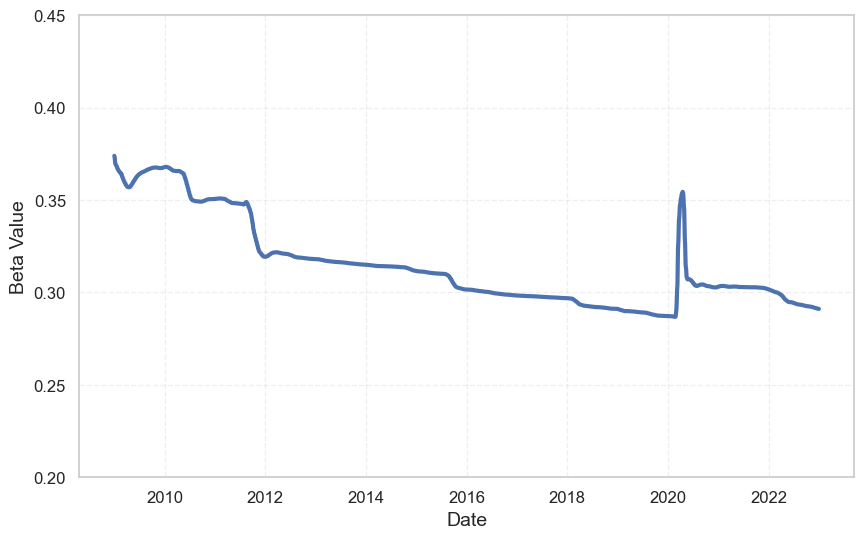

In [27]:
"""df = backtest
import matplotlib.pyplot as plt

# Filter the data to only include dates from 2009 to 2022
start_date = '2009-01-01'
end_date = '2022-12-31'
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Make sure 'beta' is numeric (especially if it was saved as a string)
df['beta'] = pd.to_numeric(df['beta'], errors='coerce')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['beta'], alpha=0.5)  # alpha is to set the transparency
plt.title('Scatter Plot of Beta Values')
plt.xlabel('Index (Time)')
plt.ylabel('Beta Value')
plt.grid(True)
plt.show()"""

"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = backtest

# Ensure 'beta' is numeric
df['beta'] = pd.to_numeric(df['beta'], errors='coerce')

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter the data to only include dates from 2009 to 2022
start_date = '2009-01-01'
end_date = '2022-12-31'
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(df['date'], df['beta'],color='#0000FF', alpha=0.7, edgecolors='w', linewidth=0.5)

# Enhance the plot with additional features
plt.title('Scatter Plot of Beta Values (2009-2022)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Beta Value', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate a few key points (example)
highlight = df[(df['date'] == '2009-01-02') | (df['date'] == '2022-12-30')]


# Save the figure
plt.savefig('scatter_plot_beta_values_2009_2022.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = backtest

# Ensure 'beta' is numeric
df['beta'] = pd.to_numeric(df['beta'], errors='coerce')

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter the data to only include dates from 2009 to 2022
start_date = '2009-01-01'
end_date = '2022-12-31'
df = df.loc[(df['date'] >= start_date) & (df['date'] <= end_date)].copy()

# Create a rolling average of the beta values
df['beta_smooth'] = df['beta'].rolling(window=35, min_periods=1).mean()

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df['date'].values, df['beta_smooth'].values, linewidth=3, label='Beta')

# Set the y-axis limit
plt.ylim(0.2, 0.45)

# Enhance the plot with additional features
#plt.title('Plot of Beta Values (2009-2022)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Beta Value', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
#plt.grid(False)
#plt.legend(fontsize=12)

# Annotate a few key points (example)
'''
highlight = df.loc[(df['date'] == '2009-01-02') | (df['date'] == '2022-12-30')]
for index, row in highlight.iterrows():
    plt.annotate(f"{row['beta']:.4f}", (row['date'], row['beta']),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='red')
'''

# Save the figure
plt.savefig('smoothed_plot_beta_values_2009_2022.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



In [28]:
filtered_df

,date,exdate,strike_price,best_bid_C,best_offer_C,best_bid_P,best_offer_P,open,close,maturity_days,is_third_friday,is_third_thursday,month,day_after_third_friday,day_after_third_thursday,include_date,year
11,1996-01-19,1996-02-17,610.0,8.75,9.25,6.125,6.500,608.24,611.83,29,True,False,1996-01,False,True,True,1996
12,1996-01-22,1996-02-17,615.0,6.00,6.50,8.375,8.625,611.83,613.40,26,False,False,1996-01,True,False,True,1996
31,1996-02-16,1996-03-16,650.0,9.50,10.00,9.625,9.750,651.32,647.98,29,True,False,1996-02,False,True,True,1996
32,1996-02-20,1996-03-16,640.0,10.75,11.25,7.750,8.250,647.98,640.65,25,False,False,1996-02,True,False,True,1996
50,1996-03-15,1996-04-20,640.0,13.25,13.50,9.875,10.250,640.87,641.43,36,True,False,1996-03,False,False,True,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6748,2022-10-24,2022-10-25,3795.0,23.00,23.30,22.900,23.200,3762.01,3797.34,1,False,False,2022-10,True,False,True,2022
6767,2022-11-18,2022-11-18,3965.0,0.50,0.55,1.000,2.050,3966.39,3965.34,0,True,False,2022-11,False,True,True,2022
6768,2022-11-21,2022-11-22,3950.0,15.20,15.40,14.400,14.600,3956.23,3949.94,1,False,False,2022-11,True,False,True,2022
6786,2022-12-16,2022-12-16,3850.0,3.90,5.70,0.300,0.450,3890.91,3852.36,0,True,False,2022-12,False,True,True,2022


In [29]:
#strategy = pd.merge(filtered_df, cg[['date','For_error','For_revision']], on='date', how='left')
strategy = pd.merge(filtered_df, backtest[['date','For_error','For_revision','beta']], on='date', how='left')
strategy

,date,exdate,strike_price,best_bid_C,best_offer_C,best_bid_P,best_offer_P,open,close,maturity_days,is_third_friday,is_third_thursday,month,day_after_third_friday,day_after_third_thursday,include_date,year,For_error,For_revision,beta
0,1996-01-19,1996-02-17,610.0,8.75,9.25,6.125,6.500,608.24,611.83,29,True,False,1996-01,False,True,True,1996,-0.007456,NaN,NaN
1,1996-01-22,1996-02-17,615.0,6.00,6.50,8.375,8.625,611.83,613.40,26,False,False,1996-01,True,False,True,1996,-0.005740,NaN,NaN
2,1996-02-16,1996-03-16,650.0,9.50,10.00,9.625,9.750,651.32,647.98,29,True,False,1996-02,False,True,True,1996,0.003920,0.005677,0.036750
3,1996-02-20,1996-03-16,640.0,10.75,11.25,7.750,8.250,647.98,640.65,25,False,False,1996-02,True,False,True,1996,0.001226,0.008532,-0.097434
4,1996-03-15,1996-04-20,640.0,13.25,13.50,9.875,10.250,640.87,641.43,36,True,False,1996-03,False,False,True,1996,-0.011504,0.008872,-1.488532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2022-10-24,2022-10-25,3795.0,23.00,23.30,22.900,23.200,3762.01,3797.34,1,False,False,2022-10,True,False,True,2022,-0.013331,0.009598,0.292045
644,2022-11-18,2022-11-18,3965.0,0.50,0.55,1.000,2.050,3966.39,3965.34,0,True,False,2022-11,False,True,True,2022,-0.009543,-0.029463,0.291406
645,2022-11-21,2022-11-22,3950.0,15.20,15.40,14.400,14.600,3956.23,3949.94,1,False,False,2022-11,True,False,True,2022,-0.004432,-0.030191,0.291367
646,2022-12-16,2022-12-16,3850.0,3.90,5.70,0.300,0.450,3890.91,3852.36,0,True,False,2022-12,False,True,True,2022,-0.007810,-0.013877,0.290938


In [30]:
strategy.to_csv('strategy.csv', index=False)

In [31]:


class BacktestStraddle:
    def __init__(self) -> None:
        self.df = pd.DataFrame()
        self.results_df = pd.DataFrame()
        
    def get_results_df(self):
        """Return the results DataFrame containing the trade results."""
        return self.results_df

    def load_data(self, path):
        self.df = pd.read_csv(path)
        self.df["date"] = pd.to_datetime(self.df["date"], format = '%Y-%m-%d')
        # Filter data to include only from 2009 onward
        self.df = self.df[self.df["date"].dt.year >= 2009]
        self.df['year_month'] = self.df['date'].dt.to_period('M')
        self.df.set_index('date', inplace=True)

      
    def populate_signals(self):
        # Identify first and second observations
        self.df['observation_rank'] = self.df.groupby('year_month').cumcount() + 1

        # Populate signals based on For_revision
        self.df['position'] = None
        
        #"""
        def determine_position(for_revision, beta):
            if beta < 0:
                return 'short' if for_revision > 0 else 'long' if for_revision < 0 else None
            else:
                return 'long' if for_revision > 0 else 'short' if for_revision < 0 else None

        self.df.loc[self.df['observation_rank'] == 2, 'position'] = self.df.apply(
            lambda row: determine_position(row['For_revision'], row['beta']), axis=1
        )
        #"""
        
        """
        self.df.loc[self.df['observation_rank'] == 2, 'position'] = self.df['For_revision'].apply(
            lambda x: 'long' if x > 0 else 'short' if x < 0 else None
        )
        """
                
        
    def calculate_option_payoff(self, close_price, strike_price, position):
        call_payoff = max(0, close_price - strike_price)
        put_payoff = max(0, strike_price - close_price)
        if position == 'long':
            # Payoff for long straddle
            total_payoff = call_payoff + put_payoff
            return total_payoff
        elif position == 'short':
            # Payoff for short straddle
            total_payoff = - (call_payoff + put_payoff)
            return total_payoff

    def run_backtest(self):
        balance = 0
        position = None
        strike_price = None
        trade_cost = 0
        open_date = None

        for index, row in self.df.iterrows():
            if position and self.df.loc[index]['observation_rank'] == 1:
                days_held = (index - open_date).days
                # Close position on first observation with payoff calculation
                payoff = self.calculate_option_payoff(row['close'], strike_price, position)
                if position == 'long':
                    #payoff -= trade_cost  # Subtract costs for long position
                    profit = payoff - trade_cost
                    return_percentage = (profit / trade_cost) * 100 if trade_cost != 0 else 0
                    trade_cost = trade_cost * -1
                else:
                    #payoff += trade_cost  # Add received premium for short position
                    profit = payoff+ trade_cost
                    #return_percentage = (profit / -payoff) * 100 if payoff != 0 else 0
                    return_percentage = (-payoff/trade_cost -1) * -100 if payoff != 0 else 0
                    
                balance += payoff
                # Calculate return percentage based on the trade's opening cost or revenue
                
                # Log and store results
                print(f"{index.date()} - Close position with profit/loss: {round(profit, 2)}$, Return: {round(return_percentage, 2)}%, Updated Balance: {round(balance, 2)}$")
                print(f"  Details: Position={position}, Strike Price={round(strike_price,2)}$, Close Price={round(row['close'],2)}$, Payoff={round(payoff,2)}, Option Costs={round(trade_cost,2)}$, Profit={round(profit,2)}$")
                print("")
                new_row = pd.DataFrame({
                    'Date': [index.date()], 
                    "For_revision" : [For_revision],
                    "beta" : [beta],
                    "Position" : [position],
                    "Strike" : [strike_price],
                    "Close Price" : [row['close']],
                    "Payoff": [payoff],
                    "Initial costs/revenue":[-trade_cost],
                    "Profit_Loss": [profit], 
                    "Return_Percentage": [return_percentage/100], 
                    "Balance": [round(balance, 2)],
                    "Days Held": [days_held],
                    "Days till maturity":[days_till_maturity]
                })
                self.results_df = pd.concat([self.results_df, new_row], ignore_index=True)
                position = None  # Reset position

            elif row['position'] and self.df.loc[index]['observation_rank'] == 2:
                open_date = index
                # Open position on second observation
                For_revision = row['For_revision']
                beta = row["beta"]
                position = row['position']
                strike_price = row['strike_price']
               # trade_cost = row['best_offer_C'] + row['best_offer_P'] if position == 'long' \
               #                else row['best_bid_C'] + row['best_bid_P']
                trade_cost = (row['best_offer_C']+row['best_bid_C'])/2 + (row['best_offer_P']+ row['best_bid_P'])/2 
                if position == 'long':
                    balance -= trade_cost  # Pay for options
                else:
                    balance += trade_cost  # Credit for options
                
                days_till_maturity = row['maturity_days']
                print(f"{index.date()} - Open {position} position at strike price {strike_price}, S={round(row['close'],2)}, Option costs/revenue: {round(trade_cost, 2)}, Remaining Balance: {round(balance, 2)}$")
                print(f"  Option Prices: Call Bid={row['best_bid_C']}, Call Offer={row['best_offer_C']}, Put Bid={row['best_bid_P']}, Put Offer={row['best_offer_P']}")

        print(f"Final balance: {round(balance, 2)}$")




# Example of using the class
backtester = BacktestStraddle()
backtester.load_data('strategy.csv')
backtester.populate_signals()
backtester.run_backtest()

results_df = backtester.get_results_df()


2009-01-20 - Open long position at strike price 805.0, S=805.22, Option costs/revenue: 92.8, Remaining Balance: -92.8$
  Option Prices: Call Bid=43.6, Call Offer=47.3, Put Bid=45.5, Put Offer=49.2
2009-02-20 - Close position with profit/loss: -57.85$, Return: -62.34%, Updated Balance: -57.85$
  Details: Position=long, Strike Price=805.0$, Close Price=770.05$, Payoff=34.95, Option Costs=-92.8$, Profit=-57.85$

2009-02-23 - Open long position at strike price 745.0, S=743.33, Option costs/revenue: 75.2, Remaining Balance: -133.05$
  Option Prices: Call Bid=34.6, Call Offer=37.6, Put Bid=37.6, Put Offer=40.6
2009-03-20 - Close position with profit/loss: -51.66$, Return: -68.7%, Updated Balance: -109.51$
  Details: Position=long, Strike Price=745.0$, Close Price=768.54$, Payoff=23.54, Option Costs=-75.2$, Profit=-51.66$

2009-03-23 - Open short position at strike price 825.0, S=822.92, Option costs/revenue: 65.75, Remaining Balance: -43.76$
  Option Prices: Call Bid=31.0, Call Offer=33.3, P

In [32]:
import numpy as np
results_df["SP500 return"] = results_df["Close Price"].pct_change()

results_df['Return_log'] = np.log(1 + results_df['Return_Percentage'])
results_df['ReturnSP500_log'] = np.log(1 + results_df['SP500 return'])

#results_df["Date"]= pd.to_datetime(results_df["Date"])
#results_df = results_df[results_df['Date'].dt.year >= 2009]

results_df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,For_revision,beta,Position,Strike,Close Price,Payoff,Initial costs/revenue,Profit_Loss,Return_Percentage,Balance,Days Held,Days till maturity,SP500 return,Return_log,ReturnSP500_log
0,2009-02-20,0.098951,0.363898,long,805.0,770.05,34.95,92.80,-57.85,-0.623384,-57.85,31,32,NaN,-0.976528,NaN
1,2009-03-20,0.042279,0.359718,long,745.0,768.54,23.54,75.20,-51.66,-0.686968,-109.51,25,26,-0.001961,-1.161450,-0.001963
2,2009-04-17,-0.003159,0.355652,short,825.0,869.60,-44.60,-65.75,21.15,0.321673,-88.36,25,26,0.131496,0.278898,0.123541
3,2009-05-15,-0.037319,0.358989,short,830.0,882.88,-52.88,-63.15,10.27,0.162629,-78.09,25,26,0.015271,0.150684,0.015156
4,2009-06-19,-0.040715,0.362458,short,910.0,921.23,-11.23,-57.55,46.32,0.804865,-31.77,32,33,0.043437,0.590486,0.042520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2022-08-19,-0.017865,0.293502,short,3830.0,4228.48,-398.48,-209.65,-188.83,-0.900692,1897.16,32,32,0.094565,-2.309525,0.090357
163,2022-09-16,-0.007270,0.292646,short,4140.0,3873.33,-266.67,-178.50,-88.17,-0.493950,1808.99,25,25,-0.083990,-0.681119,-0.087728
164,2022-10-21,0.006944,0.292579,long,3900.0,3752.75,147.25,221.55,-74.30,-0.335364,1734.69,32,32,-0.031131,-0.408516,-0.031626
165,2022-11-18,0.009598,0.292045,long,3795.0,3965.34,170.34,46.20,124.14,2.687013,1858.83,25,1,0.056649,1.304817,0.055103


In [33]:
results_df.describe()


,For_revision,beta,Strike,Close Price,Payoff,Initial costs/revenue,Profit_Loss,Return_Percentage,Balance,Days Held,Days till maturity,SP500 return,Return_log,ReturnSP500_log
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,166.000000,158.000000,166.000000
mean,-0.003655,0.314306,2283.952096,2303.133593,-9.313832,-20.038323,10.724491,0.083206,393.958204,27.329341,27.443114,0.011105,-0.073545,0.009699
std,0.033938,0.023512,1014.172586,1017.876869,131.175681,92.162364,86.380015,0.833100,777.723127,3.328307,4.440510,0.051023,0.985324,0.052969
min,-0.129457,0.286905,745.000000,768.540000,-398.480000,-219.450000,-188.830000,-2.317550,-286.420000,24.000000,1.000000,-0.309439,-7.851661,-0.370251
25%,-0.014371,0.297692,1375.000000,1391.350000,-62.475000,-58.100000,-26.450000,-0.405039,-64.085000,25.000000,25.000000,-0.010137,-0.353780,-0.010190
50%,-0.007072,0.304103,2095.000000,2089.170000,-30.700000,-43.700000,6.600000,0.115005,88.510000,25.000000,26.000000,0.016115,0.133719,0.015986
75%,0.000262,0.319442,2882.500000,2881.620000,19.205000,45.125000,33.650000,0.575550,243.680000,32.000000,32.000000,0.035633,0.474656,0.035012
max,0.292433,0.368397,4685.000000,4697.960000,920.080000,268.600000,772.830000,5.248421,2203.610000,32.000000,33.000000,0.247141,1.832329,0.220854


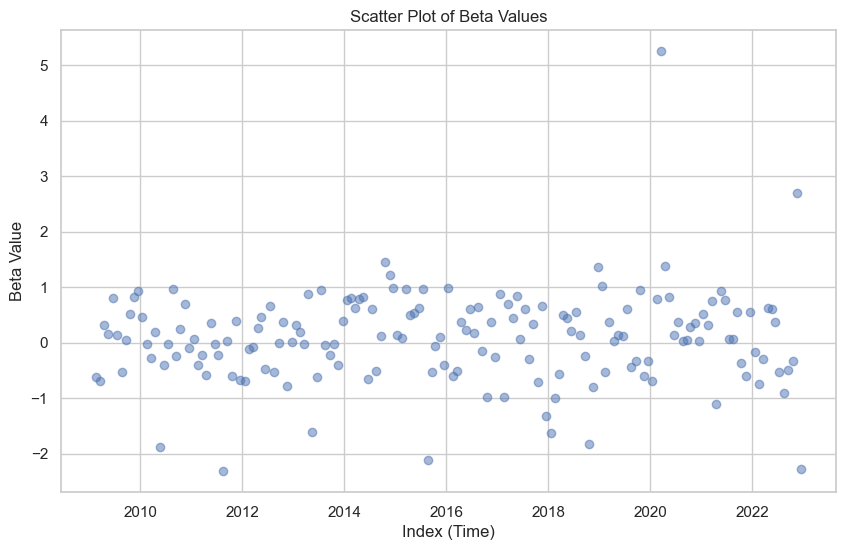

In [34]:
df = results_df

plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Return_Percentage'], alpha=0.5)  # alpha is to set the transparency
plt.title('Scatter Plot of Beta Values')
plt.xlabel('Index (Time)')
plt.ylabel('Beta Value')
plt.grid(True)
plt.show()


In [35]:
results_df['Position'].value_counts()

Position
short    123
long      44
Name: count, dtype: int64

In [36]:
results_df.to_csv('results_strategy.csv',index=False)

In [37]:
results_df['Return_log'].mean()

np.float64(-0.07354458811994181)

In [38]:

rf_rate = pd.read_csv('/Users/jorambakker/Downloads/bill-rates-2002-2023.csv')
rf_rate['Date'] = pd.to_datetime(rf_rate['Date'])

results_df['Date'] = pd.to_datetime(results_df['Date'])

data1 = pd.merge(results_df, rf_rate[['Date','4 WEEKS COUPON EQUIVALENT']], on='Date', how='left')

/var/folders/wn/lk75hc7s65b7ljzsdgw30f7c0000gn/T/ipykernel_18026/3958016125.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rf_rate['Date'] = pd.to_datetime(rf_rate['Date'])


In [39]:
data1

,Date,For_revision,beta,Position,Strike,Close Price,Payoff,Initial costs/revenue,Profit_Loss,Return_Percentage,Balance,Days Held,Days till maturity,SP500 return,Return_log,ReturnSP500_log,4 WEEKS COUPON EQUIVALENT
0,2009-02-20,0.098951,0.363898,long,805.0,770.05,34.95,92.80,-57.85,-0.623384,-57.85,31,32,NaN,-0.976528,NaN,0.19
1,2009-03-20,0.042279,0.359718,long,745.0,768.54,23.54,75.20,-51.66,-0.686968,-109.51,25,26,-0.001961,-1.161450,-0.001963,0.08
2,2009-04-17,-0.003159,0.355652,short,825.0,869.60,-44.60,-65.75,21.15,0.321673,-88.36,25,26,0.131496,0.278898,0.123541,0.04
3,2009-05-15,-0.037319,0.358989,short,830.0,882.88,-52.88,-63.15,10.27,0.162629,-78.09,25,26,0.015271,0.150684,0.015156,0.11
4,2009-06-19,-0.040715,0.362458,short,910.0,921.23,-11.23,-57.55,46.32,0.804865,-31.77,32,33,0.043437,0.590486,0.042520,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2022-08-19,-0.017865,0.293502,short,3830.0,4228.48,-398.48,-209.65,-188.83,-0.900692,1897.16,32,32,0.094565,-2.309525,0.090357,2.19
163,2022-09-16,-0.007270,0.292646,short,4140.0,3873.33,-266.67,-178.50,-88.17,-0.493950,1808.99,25,25,-0.083990,-0.681119,-0.087728,2.64
164,2022-10-21,0.006944,0.292579,long,3900.0,3752.75,147.25,221.55,-74.30,-0.335364,1734.69,32,32,-0.031131,-0.408516,-0.031626,3.48
165,2022-11-18,0.009598,0.292045,long,3795.0,3965.34,170.34,46.20,124.14,2.687013,1858.83,25,1,0.056649,1.304817,0.055103,3.85


In [40]:
data1["rf_rate"]= data1["4 WEEKS COUPON EQUIVALENT"]/100/12

In [41]:
data1.describe()

,Date,For_revision,beta,Strike,Close Price,Payoff,Initial costs/revenue,Profit_Loss,Return_Percentage,Balance,Days Held,Days till maturity,SP500 return,Return_log,ReturnSP500_log,4 WEEKS COUPON EQUIVALENT,rf_rate
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,166.000000,158.000000,166.000000,167.000000,167.000000
mean,2016-01-17 15:57:07.544910080,-0.003655,0.314306,2283.952096,2303.133593,-9.313832,-20.038323,10.724491,0.083206,393.958204,27.329341,27.443114,0.011105,-0.073545,0.009699,0.539222,0.000449
min,2009-02-20 00:00:00,-0.129457,0.286905,745.000000,768.540000,-398.480000,-219.450000,-188.830000,-2.317550,-286.420000,24.000000,1.000000,-0.309439,-7.851661,-0.370251,-0.010000,-0.000008
25%,2012-08-03 00:00:00,-0.014371,0.297692,1375.000000,1391.350000,-62.475000,-58.100000,-26.450000,-0.405039,-64.085000,25.000000,25.000000,-0.010137,-0.353780,-0.010190,0.030000,0.000025
50%,2016-01-15 00:00:00,-0.007072,0.304103,2095.000000,2089.170000,-30.700000,-43.700000,6.600000,0.115005,88.510000,25.000000,26.000000,0.016115,0.133719,0.015986,0.090000,0.000075
75%,2019-07-05 00:00:00,0.000262,0.319442,2882.500000,2881.620000,19.205000,45.125000,33.650000,0.575550,243.680000,32.000000,32.000000,0.035633,0.474656,0.035012,0.700000,0.000583
max,2022-12-16 00:00:00,0.292433,0.368397,4685.000000,4697.960000,920.080000,268.600000,772.830000,5.248421,2203.610000,32.000000,33.000000,0.247141,1.832329,0.220854,3.850000,0.003208
std,NaN,0.033938,0.023512,1014.172586,1017.876869,131.175681,92.162364,86.380015,0.833100,777.723127,3.328307,4.440510,0.051023,0.985324,0.052969,0.859568,0.000716


In [42]:
SR = (0.083206-0.000449)/0.833100
SR

0.09933621413995919

In [43]:
SR = (0.009699-0.000449)/0.052969
SR

0.17463044422209215

In [44]:
# Define the independent variable (X) and dependent variable (Y)
#data1 = results_df
data1 = data1.dropna(subset=['SP500 return', 'Return_Percentage','rf_rate'])
X = data1['SP500 return']- data1["rf_rate"]
Y = data1['Return_Percentage']- data1["rf_rate"]

# Add a constant to the independent variable matrix (for the intercept)
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Print the regression results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.462
Date:                Sun, 16 Mar 2025   Prob (F-statistic):             0.0646
Time:                        21:21:12   Log-Likelihood:                -203.15
No. Observations:                 166   AIC:                             410.3
Df Residuals:                     164   BIC:                             416.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1120      0.066      1.707      0.090      -0.018       0.242
0             -2.3480      1.262     -1.861      0.065      -4.840       0.144
==============================================================================
Omnibus:                       32.879   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.023
Skew:                           0.381   Prob(JB):                     1.85e-50
Kurtosis:                       8.704   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

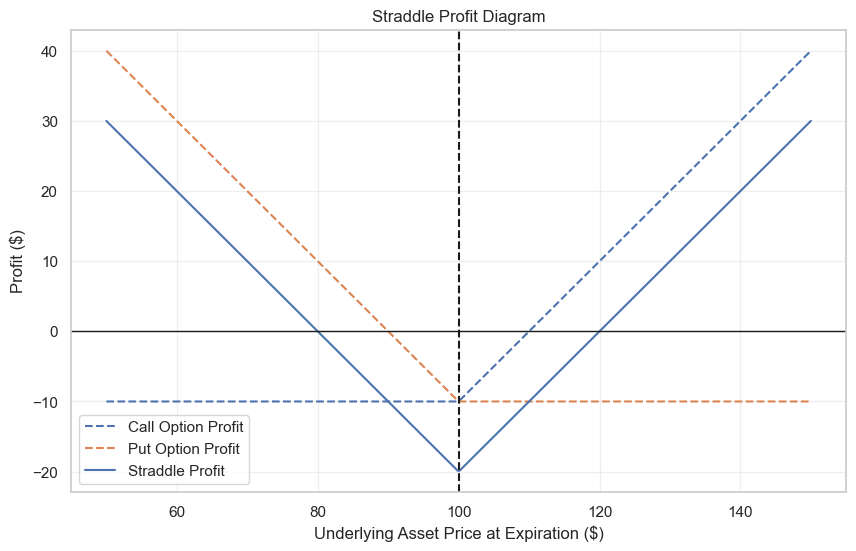

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 100  # Strike price
C = 10   # Premium for the call option
P = 10   # Premium for the put option

# Range of underlying asset prices at expiration
S = np.linspace(50, 150, 400)

# Payoff calculations
payoff_call = np.maximum(0, S - K) - C
payoff_put = np.maximum(0, K - S) - P
payoff_straddle = payoff_call + payoff_put

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, payoff_call, label='Call Option Profit', linestyle='--')
plt.plot(S, payoff_put, label='Put Option Profit', linestyle='--')
plt.plot(S, payoff_straddle, label='Straddle Profit', color='b')
plt.axhline(0, color='k', linewidth=1)
plt.axvline(K, color='k', linestyle='--')
plt.title('Straddle Profit Diagram')
plt.xlabel('Underlying Asset Price at Expiration ($)')
plt.ylabel('Profit ($)')
plt.legend()
plt.grid(True, alpha=0.3)

'''
# Customize the tick marks
plt.tick_params(axis='both', which='both', direction='in', length=6, width=1)

# Add minor ticks
#plt.minorticks_on()
plt.tick_params(axis='x', which='major', bottom=True,  direction='in', length=2)
plt.tick_params(axis='y', which='major', left=True, direction='in', length=2)
'''

# Save the plot as a .png file
plt.savefig('straddle_payoff.png')

# Display the plot
plt.show()
